In [1]:
import randomwalk as rw
import numpy as np
import matplotlib.pyplot as plt

# CW10 : Monte Carlo Techniques

The word "Monte Carlo" is a fancy term for what essentially means "using random numbers." Since computers are good at generating (pseudo)random numbers quickly, it can be advantageous to use this randomness for simulations. In this notebook, you will explore a few interesting examples of this idea.

## Estimating $\pi$
As a simple example, consider the following technique for computing the number $\pi$:
  - Area of a unit circle : $\pi$
  - Area of a the minimum box that fits the unit circle, with side length 2 : $4$
  - Fraction of area of the box taken up by the unit circle: $\pi/4$
  - Therefore: If one finds the fraction of random points that uniformly cover such a box that fall inside the unit circle, then multiplying this fraction by 4 will yield $\pi$.

Let's test this idea:

In [2]:
def estimate_pi(N=100000):
    # Generate N random x and y coordinates within the box with sides from [-2,2]
    xs = np.random.uniform(-1,1,N)
    ys = np.random.uniform(-1,1,N)
    # Count how many points lie within the unit circle
    circle = np.where(xs**2 + ys**2 < 1, 1, 0).sum()
    # Compute pi
    return 4 * circle / N

In [3]:
for N in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    print("N=",N, " : pi=", estimate_pi(N))

N= 10  : pi= 2.8
N= 100  : pi= 3.48
N= 1000  : pi= 3.252
N= 10000  : pi= 3.1312
N= 100000  : pi= 3.13524
N= 1000000  : pi= 3.139156


N= 10000000  : pi= 3.1414248


Not bad for such a simple idea!

## Integrating a Function

Consider the following definition for integrating a function $f(x)$ between $x\in[a,b]$:

In [4]:
def estimate_integral(f,a,b,N=100000):
    xs = np.random.uniform(a,b,N)
    return f(xs).sum() * (b-a)/N

What does this do? It generates $N$ randomly chosen points $x_i$ in the range $[a,b]$, then finds the average function value of all those points $\bar{f} = \sum_{i=1}^N f(x_i)/N$, then multiplies this average value by the interval length to find the area: $A = \bar{f}*(b-a)$. This method relies upon the theorem in calculus that the integral is equal to the average value of the function over a domain times the domain itself (essentially approximating the whole integral as one big rectangle). Let's see how well it works in practice.

Recall that $\int_0^{2\pi}\sin(x)dx = 0$. Let's try to compute that using Monte Carlo methods:

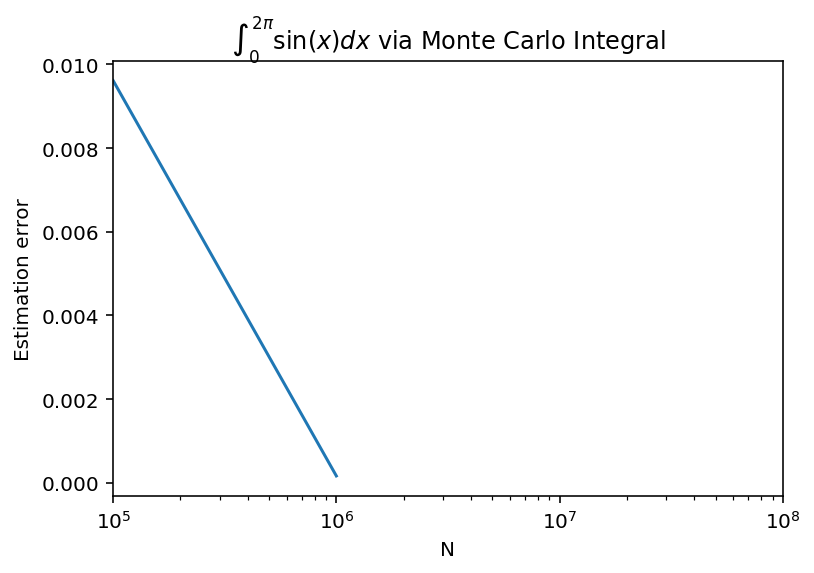

In [5]:
Ns = [10**i for i in range(5,7)]
Is = [estimate_integral(np.sin, 0, 2*np.pi, n) for n in Ns]
plt.semilogx(Ns,Is)
plt.title(r"$\int_0^{2\pi}\sin(x)dx$ via Monte Carlo Integral")
plt.xlabel("N")
plt.ylabel("Estimation error")
plt.xlim(10**5,10**8)
plt.show()

It does in fact converge eventually. Though this method is vastly less efficient than the trapezoid rule we have been using deterministically in 1D, it turns out that for higher dimensional integrals (like 10D) this stochastic technique can substantially outperform similar deterministic strategies.

## Random Walks

Where Monte Carlo methods really shine is in approximating behavior that is common in thermodynamics. For example, the air molecules in a room collide with each other constantly, effective jostling each other into random bits of short motion between collisions. Similarly, the molecules in a solid like a table vibrate and randomly exchange packets of energy as they essentially bump into each other - these packets of energy flow through the solid in the form of heat.

If we don't care much about the details of the motion, but want to capture the overall effects of the random jostling, we can simulate random walks of particles.

As a simple example, the following code places 100 particles at the origin of a 2D plane, then has them randomly walk around by taking integer steps in one of the four cardinal directions (E, W, N, S). The resulting animation shows their motion over time.

In [6]:
g = rw.walk_gen(walkers=100)

In [7]:
rw.plot_anim(g, xlim=(-50,50), ylim=(-50,50), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGg721kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAWoZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4HShe6DhKq9DAABvIzcIk3f+ABLO++E67
pBhendidMhig5WmV6h73lqDj7Mh1OsrP9f35GBGKX23n8bzqT7oTWwNaVDGHQZS1Tk42Zt8BMtTD
twpUXrXmNVJNC2SyLhfqlPF65cdQsGzFpMNaBJESVb8QxBvWgQUMZbvilb+VYoQUbuQlR0ET/4rY
TY9eXMjCwRyIVgg6Sj6hr7uNdBumu2p7hDRQAEnUEDh87papwAmwgxaOFP1Hx1s/P4JY1Mn2//A0
soxfSsfTj9lXwG4TxtIKw8Dfd0WKLHQUDzDpLJIBgNnDim7CXJ57bCMV0vhmAnRD7r5PpQp+PbhK
2w67nflvWH6oVE8n6ghcpm9FjRt8pG8iYECzH5vrFEXWLOJ1XsaBxwJZNrxZr4nyXBHl+1Z2PqW+
8pyb9xHsXeqKkS0in8HcWlTDSNvshwhe4zMM7OxcGBOreIoAFxKaMnB4KbmIhV81y22JYgZMQ5yu
OFerZgh3kimTBysfgg9qMFfi7dQSrMQLO3QqbtAB4yW0O3MnFQIGVSyGk3t3iP9ySEYNdyPIF70y
U7EG8zkQZ6Kir9CyZP7Mk7tDnB1xSbUptmU0U2IKmtFOFUEw/6Urnn6Z4q2RPgvdU8byOR2kkq/7
XlCMmGBUiIM2e8ttmWXMfwj8I7khaTV1inbwtsd3Toj8BB8oks0os+TI6YGfAlkPQJF3Y8p8jkEv
tjsQ64Hm7QVUi0eb+7tFJpSvDTbHMzre6a0LwOrIuVoAW8IWmxD8qy0g9J0Yi84J+61Qmag1wFmC
m64CYlPCHhy0W4Wuq75k6/w6+EIJS2Esa9AtdedKUq1MXm1JPF+d8i3xuRVt2AAWoABLBUGSPao+
vUGY8Or+F98+F/2cCClIuzFlPgX0DY4R//2GDTG0C8IaaOoHWHv7XrSFF61tgyWvP3NzfE9sBFeL
bwepivJc/BstH37Xr+N7f2zj74P+PfTtyHcA3Xy0vp0n66j1qjVrOQS8/zYwH2jSv8JDLyRXCDBp
DVy606t4ovPCHYAQVYpeIzZ6p3uTrOCEh5LIGToIhCsBTMlNy9Nz09ReVKTbpZh+nVJTNzzYZDen
hS2Ba+rF+B0aKWYGpIeg1Or4eQ+pimx+Sl4E/SLJ7aUQY06pTjCP4Trh98ZWgVLHJ4FV9USGbcPn
C/J8YsNxmdF45QYXbMUQ8hNyYxo+nypp5Ty35WnOZ2LjVn6elinZnwxcAU2gOT5nHZzV/VqqHjyt
qC+XX1hzfYKGDjGI/OEj5CSBnteJlZxGzXnrqhGWzrEXJGjy8y080DmmRh9zpR9wgrenW2crI3pZ
zvWiR8HrqGLgW8/Ipn+oXCJAwgSV03T6t26Tk2kdmvMmhljSOU/zDo7iyXJArqZp53zvmkDo59hY
pWZvr6nWgn/QE0kk1YCFU1cgEjJ/OvO96jGKw1ay9b1MaXdAgj0gdowZ7Cb9HehZ5eJ6TvNoEXCL
dZ5QZi9s5rS76nXDE+ZFxqnL2+x+fNG8zgCnSmVwd8h+QZOYFNu+2pCq8lS3JaYd3eKgO0GYQIPi
Ok63CYqDTICI7btMqd+Dw9ntR/aA7Cd0+2qfyM5d9IaNi6ium5ABuyAnD7Z/PS4mI3O5XkJg+MsL
8tDo2c2thFBhv+lF/75GfNpsyYpBBb5TFkugKKrXLUUikkvT52PcBTp63IH/BPc2LozT0k8bQAbJ
ZPar4cL6F4Av/rhfUd4MM9i+eU/brIVZ/7pcwEFiGOvHUm5U52BkpQFZZf3xe1kV4SBIn+s3paU8
XqtYpX3oeREAmnwagptz4lPMLfRaOGUCjulK/wTWZaAVCNl+oOgCYefL/fS4mO8loW0s5XdRqNX+
KMYsN52G98GgtsgDaq/QagJvNxUAAAFkQZokbEM//p4QZ2x3OmV6XqrCBaATDKat8wpK/Ptd/KUn
qXPtildxx3TROBlPaa2s/ZqYUjKD5pF5VE73h4L+ydP1ZiGqmdN2i+fbVMvFrpxn68vEddEGWSqm
/qBum9OFpgnK8Ov+uPBeHEKqQ59k7n4V5KhaBxTpmu0w1gXD4UWx9+OCdM+zaTu25CZ609NRhp9h
2eGz9c5fbGp6R8XMplbMIOEhinCnUWtmvDJoZWD/U7Yt5Uo389DN/BlMyq0PBbi/yofjLegI7fke
D8p5ms0XtCBunsFFnCj4z+mor25sH49RljFpsI6hcjbGYgMRKKobIvY+b6DeX0dbldoaz8Tu1iyT
1H+j+kMpcUo3OiGWvBdeToqF0pg4jSrXE05598nzlt2Stwqss6uIFKxA9jM7559+A9s5iIHcz6HZ
eQjJcaHPXh3Qe4mB4CDfSZk2pZuwIs/0uvnEyIy8naYQ6pE57RgAAACGQZ5CeIR/BH3XXWpbbqRK
+QtYeL4LzNgxmHFIrA06WARvah3PMMnIPPMH+tJvMZse9iBU66pVAYNvk1HXnK2mrjwAnSr/0sgy
BsxDP071nhhffzPJhpodWcXGljyYJvV3LvrJgBU+uIs0DKA3YP5ntSJ9L/4Oetmr3tyLHvWlzOb0
qk2bEUUAAABTAZ5hdEf/B+vMQeRaLy/7AAADAABtEnaplg9My9iIz3UhgUAAl+qCZI5ESaMlhw8w
4h/taSjO5PaUjs+x+WN5fXp1PhF7f+Oc/VfZ2qJxJsD0W+wAAABwAZ5jakf/B+27qsCv60N6bCQA
AAMAUQlMsIGhO/mM5FNNrQEAAh7ZP6/6FkRqy+2YRzzo/i7l9c8tNcnT2yRUs6T5Ks2WV3xfYCyn
I5NSj5J4qGPdiVV0icrdsPP9pOgRmB5UqcR2BfcgN4V5loiFQQAAARhBmmhJqEFomUwIZ//+nhB/
4sc8wwfKE0y0yEBZJ5zgA

## Exercise

Create a new random walk generator that prevents the particles from passing through a box with walls at $x=-20,20$ and $y=-20,20$.  To make things interesting, place a hole in your box at $x=20$ for the range $y\in[-4,4]$ such that particles can wander freely in that region of the hole as before.  Make sure particles outside the box and inside the box cannot move through the box walls, but otherwise move freely.  Modify the animation function so that the initialization frame draws the boundaries of your box in addition to the particles.

In [8]:
g2 = rw.new_walk_gen(walkers=100)

In [9]:
rw.new_plot_anim(g2, xlim=(-50,50), ylim=(-50,50), max_frames=300)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAACiTW1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAZSZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4HShe6DhKq9DAABvIzcIk3f+ABLO++E67
pBhendidMhig5WmV6h73lqDj7Mh1OsrP9f35GBGKX23n8bzqT7oTWwNaVDGHQZS1Tk42Zt8BMtTD
twpUXrXmNVJNC2SyLhfqlPF65cdQsGzFpMNaBJESVb8QxBvWgQUMZbvilb+VYoQUbuQlR0ET/4rY
TY9eXMjCwRyIVgg6Sj6hr7uNdBumu2p7hDRQAEnUEDh87papwAmwgxaOFP1Hx1s/P4JY1Mn2//A0
soxfSsfTj9lXwG4TxtIKw8Dfd0WKLHQUDzDpLJIBgNnDim7CXJ57bCMV0vhmAnRD7r5PpQp+PbhK
2w67nflvWH6oVE8n6ghcpm9FjRt8pG8if99hE4DA8etUgeNM/GoTg/s00RyBBOQwXE7Rygg8q0sj
4EWnhwrQ/VlP1i9+Dbuz+3DfcQG/M0FvmUraEa97CAHl33rvMBYuPGyNjH3PImh4hIb/vSW+gjE6
FiP/oD5K0dyjRnJVSetJybovpMwSJaRUC3YBGUEug2prbCcEtTUk7+DUBJnt8KO4H1vCERPJCdfu
wbQahDWpF50l+Zb4ee/NXl7MKY/0ZvDQrrxYfSlsxCJNmJAJbV0DTxMdsIV2QhsIzWqoisqjZJar
1yMPbxfyd9ZHdVWKObb+ZqQCH10/juUEP1GRFN71Ush4/HM9G3eaTRuc4LZ6Dx8DignjZ5h13XkJ
SsUFLgklRgH6a5aC+S9GSGLLhK7cBkvXmugPxIhS/IfKiPL6JMYpeObs0uf1qLEAL5XgL1pQElua
QOMJ7rNqqQpJyd7wG+DHD924rCKoLwDB0Uqu+EHi7ZjY954ifUGr6fKlUd3Wf2l5MpmoABPBA1Bb
Fwl7kTLdPGQ/rLImklEqAiplC5tKNvkbkr/uIG0Bueg122dMAYJso1Ibn+UVMYaGf8OcmxbsRLgA
gOg8Haaq88MhkXDonzUpTWjWrA3I8LFOH6gC16f9vw6dEIJS2Esa9AtdedKUq1MXm1JPF+d8i3xu
RWOJuOJsG1ABeUhdHvAUJnEAvzhkL1LQ/BMVyEZzRhcv1dZOTeozvrtU3ROEH5BsgHRuBFJslbcz
OoBL4mTlH+RWd/8mtyrHHHu8XLUhZ4qGkSspYa+4X2FidGLAWFoydril+IB09oYrr3ul1SnEdS4U
Dd82GgIio9d72fyBsxA+a+R/rRd+HWtJ9P9Aq+Wk1btdpPNGo1bDSZEm+bFLmeQ5RSQ+9rV51Cxm
okVp1bxReeDQBE6OWU6QZzQ5lvjfoNKLypIQ34AWLiHmt3guijIRBpUpNulmH6dUlM3f7+Y/W5N9
FYFr6sX4HRn9R48pDszlFVewuoTHxzIYH/iaCUb6/eGvogxp1RjV/coNNP0b6f55q/u0sdqjokM2
4fOF+T4xWzxylW4g24mgc3ditHgDSvNt6BPlac5nYuNWfjmjHjNPNwK71yloWZqnUa9po+qh48ra
gvljdYc32Chg4xJEzhI+QkgZ7XiUtNkqAPve+JLuKSSPcrR6Whgj8QQWtQae2uSCvV5e87ViY0s5
3rRI+D11DNlVQDjeEN4XCJAwgRn/iUkap8RWtF9ismTQyxpHKf5h03xZLkgV1PR0e875pA6OfYWc
Vmb6+p1oNj+sWgjzaAhVI1PhQsQxcwIARoosNWsvW9TGl3gII9IHaMGewnDop9CDN7MfpKtAi4RU
JX+rMXtnNaXcaS4YnzIuNU5e38dT1c9PEAVIzDGlDEPyDJzApt4edLNVUJW5BHLu7xUB2gzRyT5x
0nW4TFQaYJhHc6TtnU52N01PdERUv3hSmcTFcZmC8Gjs2/vs0yit2QE4fbP56a01G53K8hMHxlhf
oncZQoi/coMN/0ov/awz5tNmb8oUXDaReWpnb1bK+ps0sJA/Ox7gKdPW5A/4J7mxdGaeknV2uDZL
J7VfDhfSJCvwJRkwfHh3i6P3+OuG1ysevdLmAgsQx147jKTHB0gU3StCv++L2skO9o9E/1m9LSni
7oVlK+9DyIgE0GWUFNufEp5hLCLRwygUd0pXrib63OCoRsv05yITDz5f76XE53ktC2lnK7qNUC/v
BjFh0hn0vg0F0AABdHTwzhccmQAAAPtBmiRsQv/+jLBsa3bnw3xSKMH5oBozQewy1yVR+aGOcQ+B
suFN16UQHKxtMJtS2tA4zawQhpPBQ6u0cv7e8U9XI9O8A6m/qNqQrutSqxWxleTxQPJBWQm8R0Wk
wdtI/yfDv4AW75c1SIvvCO2WPxWwOolPXTBMqXBN4LFDiD3E6nYyZdALGRGnLphCME9OwR0pFnWq
HkROLdod5AimJEmQbmF5djCtwsWgSjAMGx1M8vdchpNr9Ysn19RuHKkI9Pk7iDhw74CuK0cPONaZ
/PKCo0XXsK37sZMI02FvmJuMiE+VK69y86R/MYvimSlvAngPUdhyyjvQREsPogAAAFBBnkJ4hH8E
fdddaltupEr5C1h4vgvM2DGYcUisDTpYBG9qHc8wycg88wf60m8xmx72IFTrqlUKqjP5uuzCQHvS
0zrARpbVQc49V04N1Mr5GwAAACsBnmF0R/8H68xB5FovL/sAAAMAAG0SdqmWaQacOJxM2v4DkMF3
BMYfqmHAAAAAOAGeY2pH/wftu6rAr+tDemwkAAADAFEJTLN0LPYYAGRdxQAJ1ah2jBSRi+0FrqvM
2iqV4V4J6SxhAAAAhkGaaEmoQWiZTAhf//6MsITidR6m9fl5ZAOYo9U0RZEAAxZ9gLt4KtcQjWTC
fNOqQUFRr2X+YIAA43mXBrWG3Q8TaRGMCxZ50RCgVd8cyYli1vXCQoo1Z5oZurCfmnZScNDaVhoI
qa7Iz5BK2DTbuRkQxt6+o